## Derivatives Examples

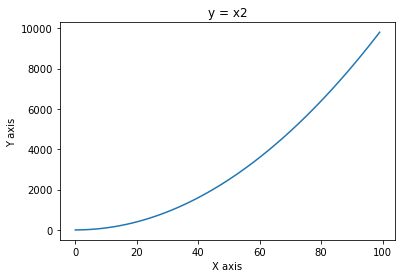

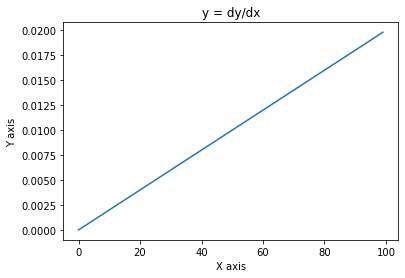

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from typing import Callable

x = np.array([i for i in range(0,100)])

def square(x: np.ndarray) -> np.ndarray:
    '''square of each element in the array'''
    return np.power(x, 2)

def derive(func: Callable[[np.ndarray],np.ndarray],
          input_: np.ndarray,
          delta: float = 0.01) -> np.ndarray:
    return (func(input_+delta)-func(input_-delta))/2*delta

y = square(x)
dy_by_dx = derive(square, x)

plt.title('y = x2')
plt.xlabel("X axis") 
plt.ylabel("Y axis") 
plt.plot(x,y)
plt.show()

plt.title('y = dy/dx')
plt.xlabel("X axis") 
plt.ylabel("Y axis") 
plt.plot(x,dy_by_dx)
plt.show()

In [54]:
def softmax(a: np.ndarray) -> np.ndarray:
    e = np.exp(a)
    edenom = e.sum(axis=1,keepdims=True)
    return e/edenom

a = np.random.randn(20,10)
smax_of_a = softmax(a)
smax_of_a.sum(axis=1)

## Forward Propagation (No Training)
Forward propagation example with sigmoid and softmax activation

Classification rate for randomly chosen weights: 0.3333333333333333


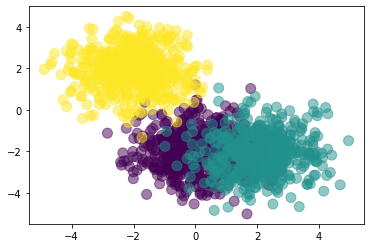

In [52]:
#forward propagation
import numpy as np
import matplotlib.pyplot as plt

# dimensions
N = 500
D = 2
M = 3
K = 3

# random gaussian initialization of samples 
# total of 1500 samples and 2 features
X1 = np.random.randn(N,D) + np.array([0,-2])
X2 = np.random.randn(N,D) + np.array([2,-2])
X3 = np.random.randn(N,D) + np.array([-2, 2])
X = np.concatenate((X1,X2,X3), axis=0)
Y = np.array([0]*N+[1]*N+[2]*N)
plt.scatter(X[:,0],X[:,1], c=Y, s=100, alpha=0.5)

# initialize random weights
W1 = np.random.randn(D,M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

def softmax(a: np.ndarray) -> np.ndarray:
    e = np.exp(a)
    edenom = e.sum(axis=1,keepdims=True)
    return e/edenom

def sigmoid(a: np.ndarray) -> np.ndarray:
    return 1/(1+np.exp(-a))

def forward_propagation(X: np.ndarray, W1: np.ndarray, b1: np.ndarray,
                        W2: np.ndarray,b2: np.ndarray):
    Z = sigmoid(X.dot(W1)+b1) #will be NxM - first layer operation
    P = softmax(Z.dot(W2)+b2) # second layer operation to get result
                              # totally two layers
    return P

def classification_rate(T: np.ndarray, P: np.ndarray) -> float:
    total = 0
    current = 0
    for i in range(len(T)):
        total = total + 1
        if T[i] == P[i]:
            current = current + 1
    return current/total

PY_for_X = forward_propagation(X, W1, b1, W2, b2)
P = np.argmax(PY_for_X, axis=1)

# verify we chose the correct axis
assert(len(P) == len(Y))
print("Classification rate for randomly chosen weights:", classification_rate(Y, P))
    